In [1]:
import pandas as pd



In [2]:
df = pd.read_csv("IT24100425_LabelEncoding.csv")



One hot Encode

In [3]:
print(df.head())

  student_id        origin_country destination_country destination_city  \
0     S00001               Finland              Russia           Moscow   
1     S00002        United Kingdom             Germany           Aachen   
2     S00005          South Africa             Germany        Stuttgart   
3     S00006  United Arab Emirates        South Africa         Pretoria   
4     S00007  United Arab Emirates      United Kingdom        Edinburgh   

                     university_name              course_name field_of_study  \
0  Lomonosov Moscow State University         Computer Science    Engineering   
1                        RWTH Aachen        Civil Engineering            Law   
2            University of Stuttgart  Business Administration            Law   
3             University of Pretoria   Mechanical Engineering    Engineering   
4            University of Edinburgh             Architecture            Law   

   year_of_enrollment  scholarship_received    enrollment_reason  \


In [8]:
print(df.dtypes)

student_id                    object
origin_country                object
destination_country           object
destination_city              object
university_name               object
course_name                   object
field_of_study                object
year_of_enrollment             int64
scholarship_received           int64
enrollment_reason             object
graduation_year                int64
placement_status               int64
placement_country             object
placement_company             object
starting_salary_usd            int64
gpa_or_score                 float64
visa_status                   object
post_graduation_visa          object
language_proficiency_test     object
test_score                   float64
dtype: object


In [4]:
print("Shape of dataset:", df.shape)

Shape of dataset: (4018, 20)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4018 entries, 0 to 4017
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   student_id                 4018 non-null   object 
 1   origin_country             4018 non-null   object 
 2   destination_country        4018 non-null   object 
 3   destination_city           4018 non-null   object 
 4   university_name            4018 non-null   object 
 5   course_name                4018 non-null   object 
 6   field_of_study             4018 non-null   object 
 7   year_of_enrollment         4018 non-null   int64  
 8   scholarship_received       4018 non-null   int64  
 9   enrollment_reason          4018 non-null   object 
 10  graduation_year            4018 non-null   int64  
 11  placement_status           4018 non-null   int64  
 12  placement_country          4018 non-null   object 
 13  placement_company          4018 non-null   objec

In [9]:
categorical_cols = ['origin_country','destination_country','destination_city','university_name','course_name','field_of_study','enrollment_reason','placement_country', 'placement_company', 'language_proficiency_test','visa_status','post_graduation_visa']
data_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("One-Hot Encoding Completed")
print("Shape before encoding:", df.shape)
print("Shape after encoding:", data_encoded.shape)
data_encoded.head(10)

One-Hot Encoding Completed
Shape before encoding: (4018, 20)
Shape after encoding: (4018, 209)


,student_id,year_of_enrollment,scholarship_received,graduation_year,placement_status,starting_salary_usd,gpa_or_score,test_score,origin_country_Finland,origin_country_Germany,...,language_proficiency_test_TOEFL,visa_status_J1,visa_status_Schengen Student Visa,visa_status_Student Visa,visa_status_Study Permit,visa_status_Tier 4,post_graduation_visa_OPT,post_graduation_visa_PSW,post_graduation_visa_Post-Study Visa,post_graduation_visa_Work Permit
0,S00001,2021,0,2024,1,36416,3.92,7.8,1,0,...,1,0,0,0,0,1,0,0,0,1
1,S00002,2023,1,2024,1,32956,2.60,7.9,0,0,...,0,0,0,0,1,0,1,0,0,0
2,S00005,2020,1,2021,1,54790,2.96,8.2,0,0,...,0,0,1,0,0,0,1,0,0,0
3,S00006,2022,1,2023,0,0,2.69,7.4,0,0,...,1,1,0,0,0,0,0,0,0,0
4,S00007,2019,1,2021,0,0,2.99,5.6,0,0,...,0,0,0,0,1,0,0,0,0,0
5,S00008,2023,0,2024,1,98247,3.53,5.4,0,0,...,0,0,0,1,0,0,0,0,0,1
6,S00012,2020,1,2022,1,143194,2.78,6.5,0,0,...,0,0,0,1,0,0,1,0,0,0
7,S00013,2020,0,2022,1,89534,3.47,6.7,0,0,...,1,0,0,0,0,0,0,0,1,0
8,S00014,2021,1,2024,0,0,2.91,6.5,0,0,...,1,0,0,0,1,0,1,0,0,0
9,S00015,2020,1,2021,0,0,3.00,8.1,0,0,...,0,0,0,0,1,0,0,0,1,0


In [10]:
columns_filtered = data_encoded.filter(like='origin_country')
print(columns_filtered.head())

   origin_country_Finland  origin_country_Germany  origin_country_India  \
0                       1                       0                     0   
1                       0                       0                     0   
2                       0                       0                     0   
3                       0                       0                     0   
4                       0                       0                     0   

   origin_country_Ireland  origin_country_Russia  origin_country_South Africa  \
0                       0                      0                            0   
1                       0                      0                            0   
2                       0                      0                            1   
3                       0                      0                            0   
4                       0                      0                            0   

   origin_country_United Arab Emirates  origin_country_United 

In [11]:
columns_filtered = data_encoded.filter(like='origin_country')

origin_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
origin_counts.plot(kind='bar')

plt.title("Count of Students by origin_country")
plt.xlabel("origin_country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

In [12]:
columns_filtered = data_encoded.filter(like='destination_country')
print(columns_filtered.head())

   destination_country_Finland  destination_country_Germany  \
0                            0                            0   
1                            0                            1   
2                            0                            1   
3                            0                            0   
4                            0                            0   

   destination_country_India  destination_country_Ireland  \
0                          0                            0   
1                          0                            0   
2                          0                            0   
3                          0                            0   
4                          0                            0   

   destination_country_Russia  destination_country_South Africa  \
0                           1                                 0   
1                           0                                 0   
2                           0                        

In [13]:
columns_filtered = data_encoded.filter(like='destination_country')

destination_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
destination_counts.plot(kind='bar')

plt.title("Count of Students by Destination Country")
plt.xlabel("Destination Country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

NameError: name 'plt' is not defined

In [14]:
columns_filtered = data_encoded.filter(like='destination_city')
print(columns_filtered.head())

   destination_city_Abu Dhabi  destination_city_Bangalore  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   destination_city_Berlin  destination_city_Birmingham  \
0                        0                            0   
1                        0                            0   
2                        0                            0   
3                        0                            0   
4                        0                            0   

   destination_city_Boston  destination_city_Cambridge  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                    

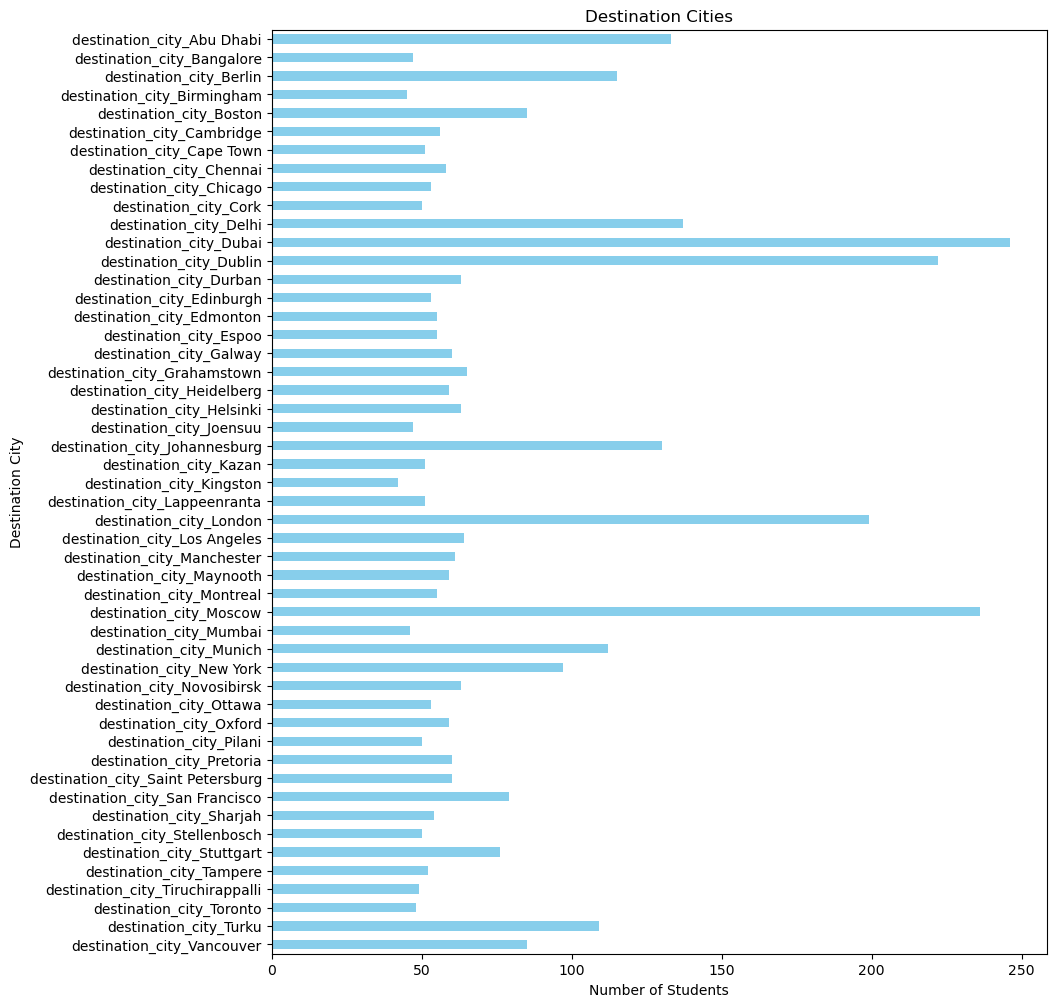

In [20]:
columns_filtered = data_encoded.filter(like='destination_city')

destination_counts = columns_filtered.sum()

plt.figure(figsize=(10,12))
destination_counts.plot(kind='barh', color='skyblue')
plt.title("Destination Cities")
plt.xlabel("Number of Students")
plt.ylabel("Destination City")
plt.gca().invert_yaxis()  # largest on top
plt.show()

In [21]:
columns_filtered = data_encoded.filter(like='university_name')
print(columns_filtered.head())

   university_name_American University of Sharjah  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   university_name_BITS Pilani  \
0                            0   
1                            0   
2                            0   
3                            0   
4                            0   

   university_name_Bauman Moscow State Technical University  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   university_name_Columbia University  university_name_Delhi University  \
0                    

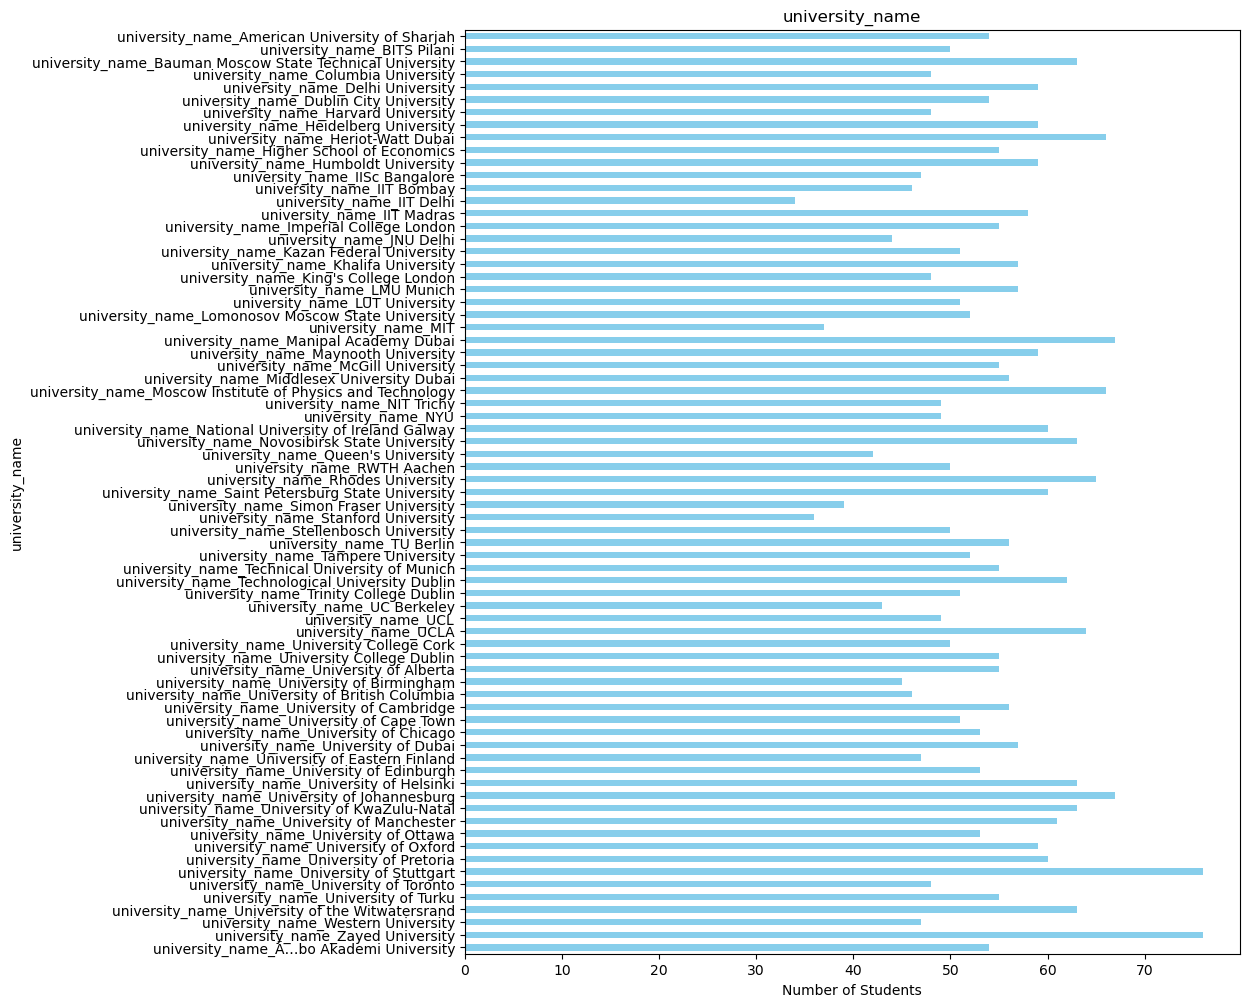

In [22]:
columns_filtered = data_encoded.filter(like='university_name')

university_name_counts = columns_filtered.sum()

plt.figure(figsize=(10,12))
university_name_counts.plot(kind='barh', color='skyblue')
plt.title("university_name")
plt.xlabel("Number of Students")
plt.ylabel("university_name")
plt.gca().invert_yaxis()  # largest on top
plt.show()

In [23]:
columns_filtered = data_encoded.filter(like='course_name')
print(columns_filtered.head())

   course_name_Biotechnology  course_name_Business Administration  \
0                          0                                    0   
1                          0                                    0   
2                          0                                    1   
3                          0                                    0   
4                          0                                    0   

   course_name_Civil Engineering  course_name_Computer Science  \
0                              0                             1   
1                              1                             0   
2                              0                             0   
3                              0                             0   
4                              0                             0   

   course_name_Data Science  course_name_Design  course_name_Economics  \
0                         0                   0                      0   
1                         0             

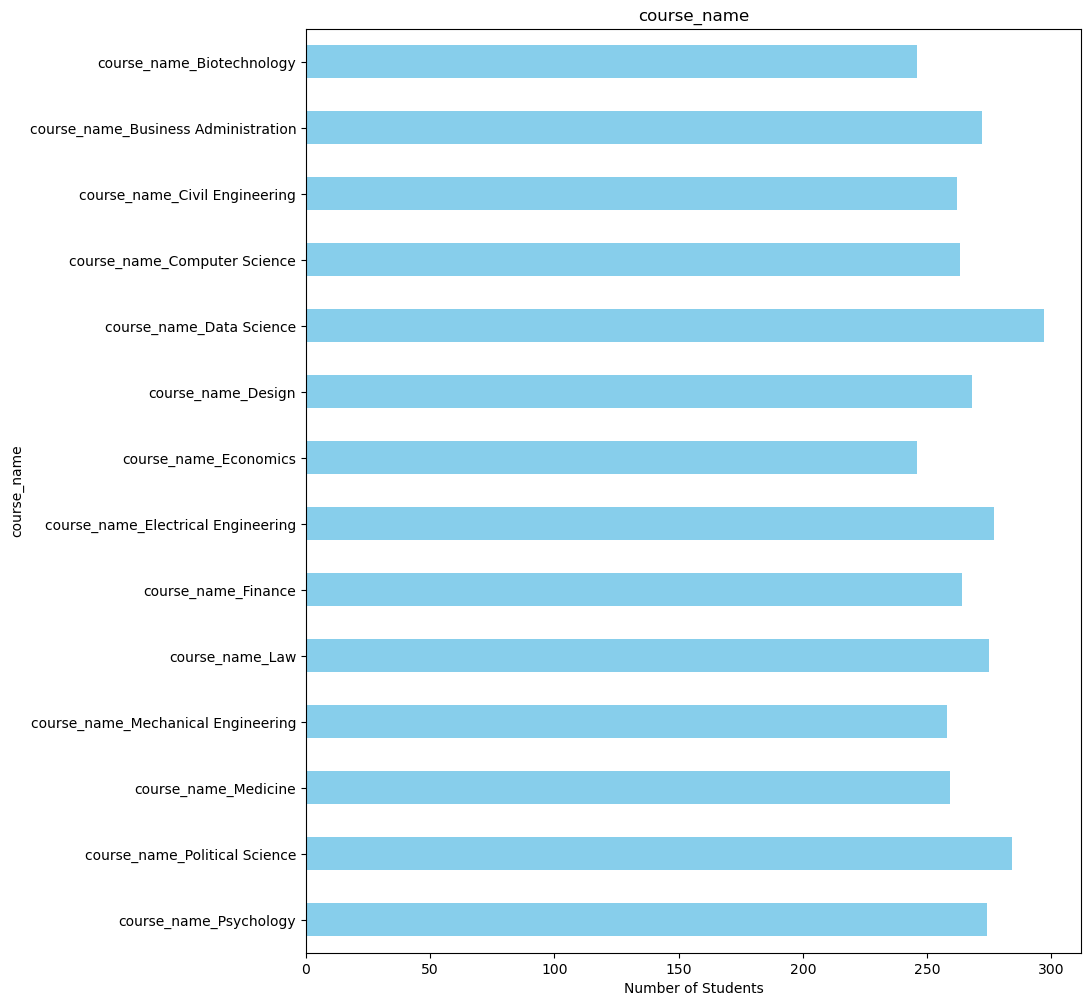

In [24]:
columns_filtered = data_encoded.filter(like='course_name')

course_name_counts = columns_filtered.sum()

plt.figure(figsize=(10,12))
course_name_counts.plot(kind='barh', color='skyblue')
plt.title("course_name")
plt.xlabel("Number of Students")
plt.ylabel("course_name")
plt.gca().invert_yaxis()  # largest on top
plt.show()

In [25]:
columns_filtered = data_encoded.filter(like='field_of_study')
print(columns_filtered.head())

   field_of_study_Business  field_of_study_Computer Science  \
0                        0                                0   
1                        0                                0   
2                        0                                0   
3                        0                                0   
4                        0                                0   

   field_of_study_Engineering  field_of_study_Law  field_of_study_Medicine  \
0                           1                   0                        0   
1                           0                   1                        0   
2                           0                   1                        0   
3                           1                   0                        0   
4                           0                   1                        0   

   field_of_study_Natural Sciences  field_of_study_Social Sciences  
0                                0                               0  
1             

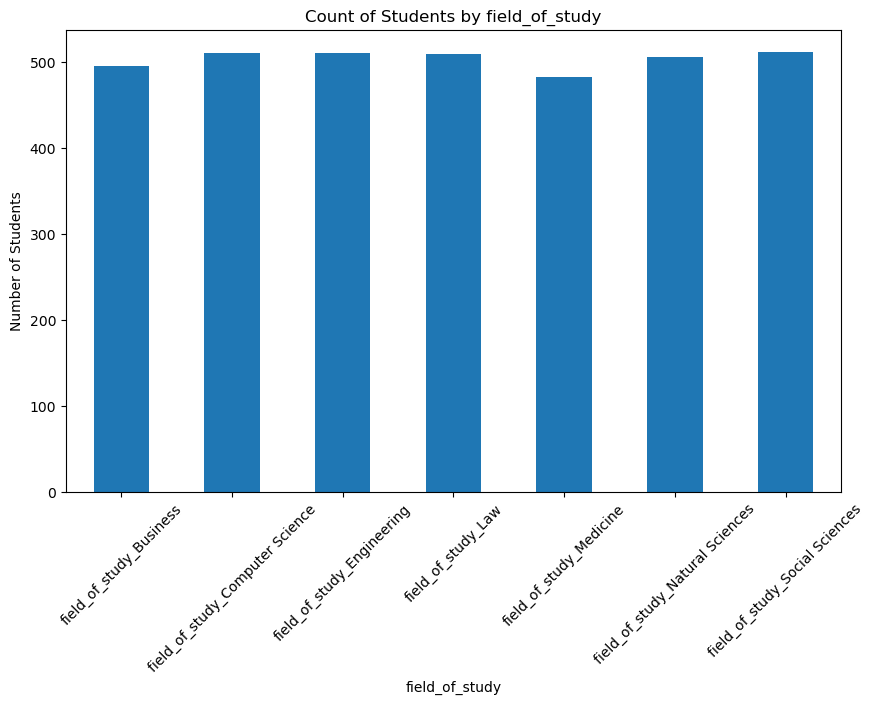

In [26]:
columns_filtered = data_encoded.filter(like='field_of_study')

field_of_study_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
field_of_study_counts.plot(kind='bar')

plt.title("Count of Students by field_of_study")
plt.xlabel("field_of_study")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [27]:
columns_filtered = data_encoded.filter(like='enrollment_reason')
print(columns_filtered.head())

   enrollment_reason_Job Opportunities  enrollment_reason_Political Stability  \
0                                    0                                      0   
1                                    1                                      0   
2                                    0                                      1   
3                                    1                                      0   
4                                    0                                      0   

   enrollment_reason_Quality of Life  enrollment_reason_Scholarship  
0                                  0                              0  
1                                  0                              0  
2                                  0                              0  
3                                  0                              0  
4                                  1                              0  


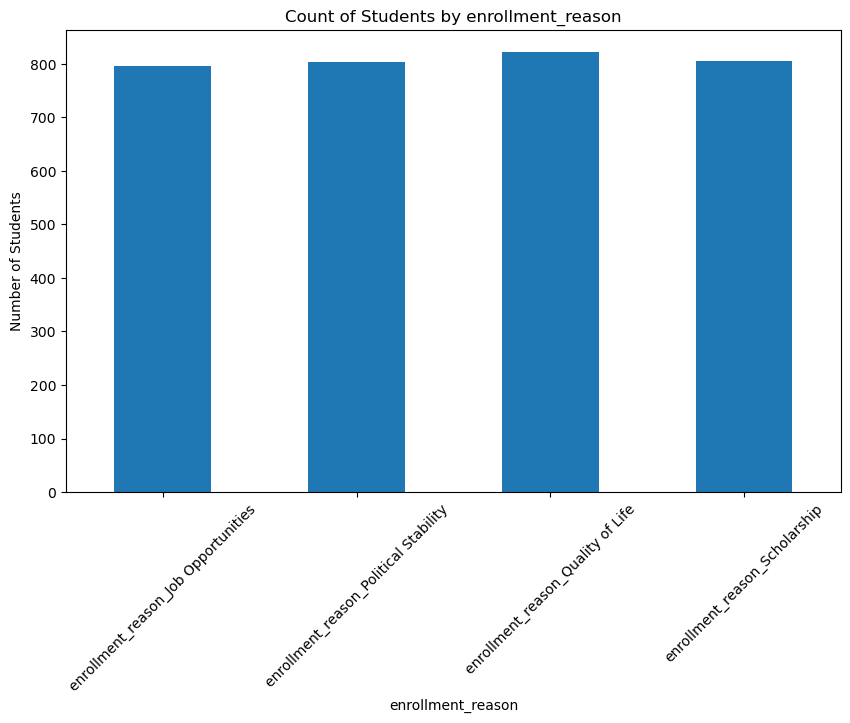

In [28]:
columns_filtered = data_encoded.filter(like='enrollment_reason')

enrollment_reason_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
enrollment_reason_counts.plot(kind='bar')

plt.title("Count of Students by enrollment_reason")
plt.xlabel("enrollment_reason")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [29]:
columns_filtered = data_encoded.filter(like='placement_country')
print(columns_filtered.head())

   placement_country_Finland  placement_country_Germany  \
0                          0                          0   
1                          0                          1   
2                          0                          1   
3                          0                          0   
4                          0                          0   

   placement_country_India  placement_country_Ireland  \
0                        0                          0   
1                        0                          0   
2                        0                          0   
3                        0                          0   
4                        0                          0   

   placement_country_No Placement  placement_country_Russia  \
0                               0                         1   
1                               0                         0   
2                               0                         0   
3                               1                 

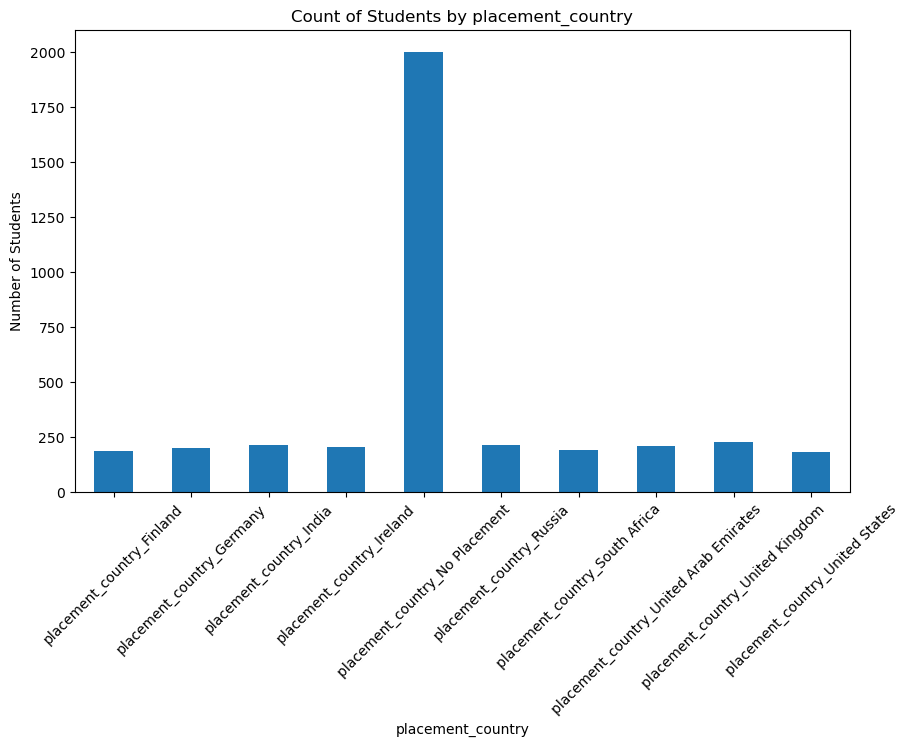

In [30]:
columns_filtered = data_encoded.filter(like='placement_country')

placement_country_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
placement_country_counts.plot(kind='bar')

plt.title("Count of Students by placement_country")
plt.xlabel("placement_country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [31]:
columns_filtered = data_encoded.filter(like='placement_company')
print(columns_filtered.head())

   placement_company_Apple  placement_company_Deloitte  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   placement_company_Facebook  placement_company_Goldman Sachs  \
0                           0                                0   
1                           0                                0   
2                           0                                0   
3                           0                                0   
4                           0                                0   

   placement_company_Google  placement_company_IBM  placement_company_Intel  \
0                         0                      0                        0   
1                         1                      0                        0   
2                

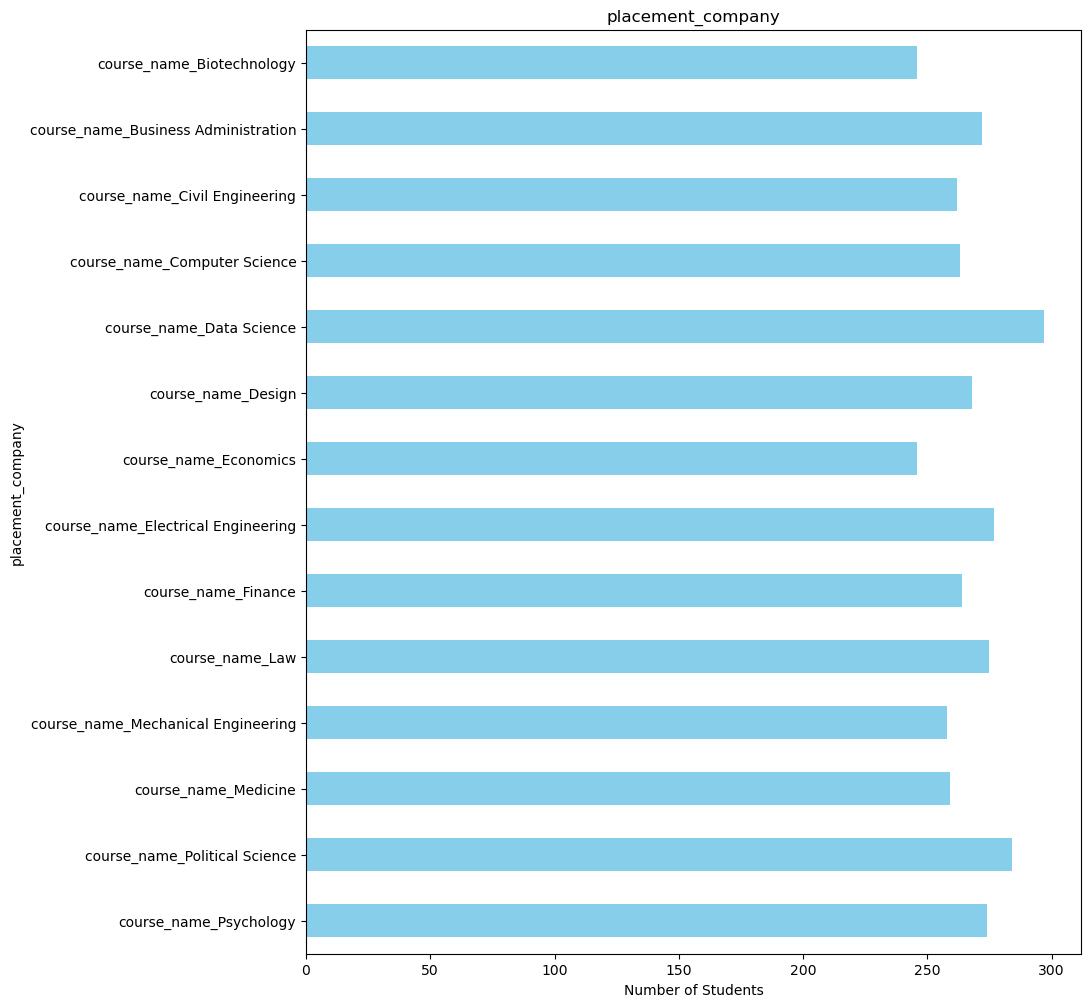

In [32]:
columns_filtered = data_encoded.filter(like='placement_company')

placement_company_counts = columns_filtered.sum()

plt.figure(figsize=(10,12))
course_name_counts.plot(kind='barh', color='skyblue')
plt.title("placement_company")
plt.xlabel("Number of Students")
plt.ylabel("placement_company")
plt.gca().invert_yaxis()  # largest on top
plt.show()

In [33]:
df['language_proficiency_test'].unique()

array(['TOEFL', 'PTE', 'Duolingo', 'IELTS'], dtype=object)

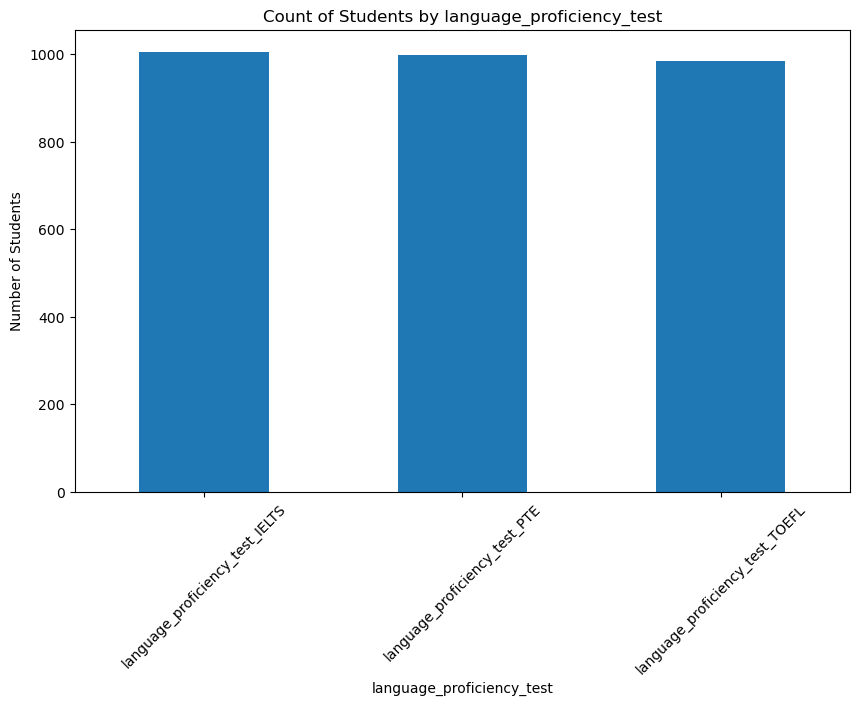

In [34]:
columns_filtered = data_encoded.filter(like='language_proficiency_test')

language_proficiency_test_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
language_proficiency_test_counts.plot(kind='bar')

plt.title("Count of Students by language_proficiency_test")
plt.xlabel("language_proficiency_test")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [35]:
columns_filtered = data_encoded.filter(like='visa_status')
print(columns_filtered.head())

   visa_status_J1  visa_status_Schengen Student Visa  \
0               0                                  0   
1               0                                  0   
2               0                                  1   
3               1                                  0   
4               0                                  0   

   visa_status_Student Visa  visa_status_Study Permit  visa_status_Tier 4  
0                         0                         0                   1  
1                         0                         1                   0  
2                         0                         0                   0  
3                         0                         0                   0  
4                         0                         1                   0  


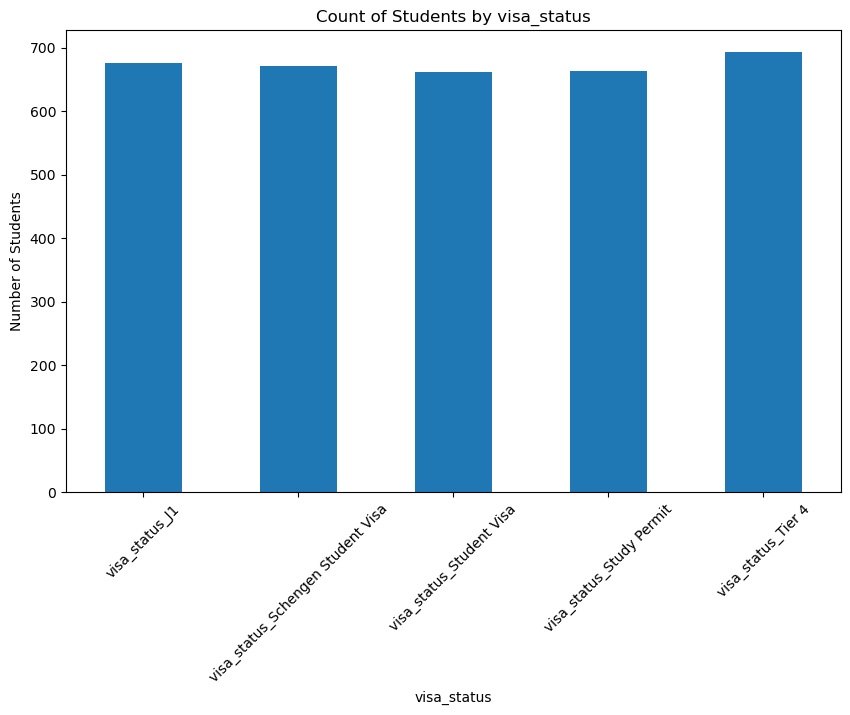

In [36]:
columns_filtered = data_encoded.filter(like='visa_status')

visa_status_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
visa_status_counts.plot(kind='bar')

plt.title("Count of Students by visa_status")
plt.xlabel("visa_status")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

In [37]:
columns_filtered = data_encoded.filter(like='post_graduation_visa')
print(columns_filtered.head())

   post_graduation_visa_OPT  post_graduation_visa_PSW  \
0                         0                         0   
1                         1                         0   
2                         1                         0   
3                         0                         0   
4                         0                         0   

   post_graduation_visa_Post-Study Visa  post_graduation_visa_Work Permit  
0                                     0                                 1  
1                                     0                                 0  
2                                     0                                 0  
3                                     0                                 0  
4                                     0                                 0  


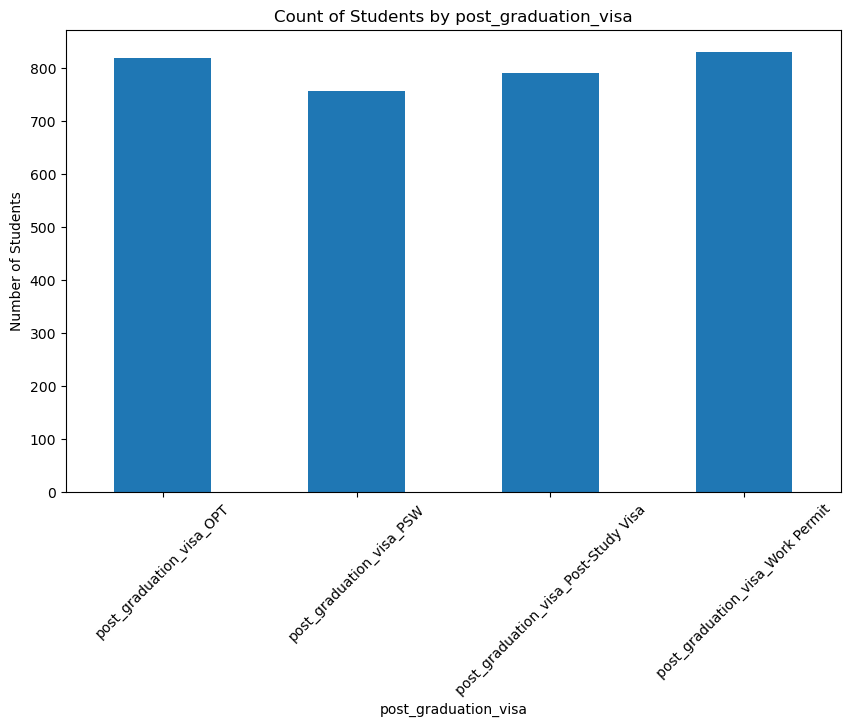

In [38]:
columns_filtered = data_encoded.filter(like='post_graduation_visa')

post_graduation_visa_counts = columns_filtered.sum()

plt.figure(figsize=(10, 6))
post_graduation_visa_counts.plot(kind='bar')

plt.title("Count of Students by post_graduation_visa")
plt.xlabel("post_graduation_visa")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.show()

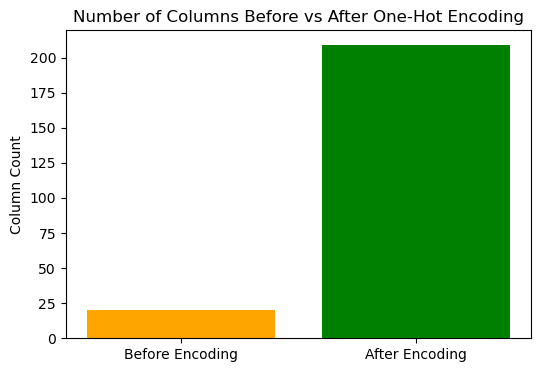

In [39]:
plt.figure(figsize=(6,4))
plt.bar(["Before Encoding", "After Encoding"], [df.shape[1],data_encoded.shape[1]], color=["orange", "green"])
plt.title("Number of Columns Before vs After One-Hot Encoding")
plt.ylabel("Column Count")
plt.show()

In [40]:
data_encoded.shape

(4018, 209)

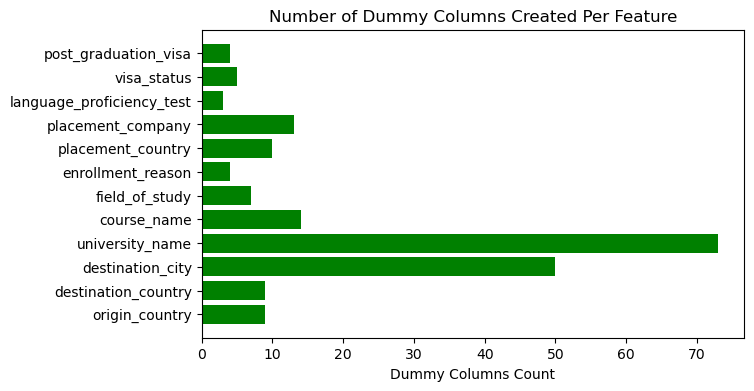

In [41]:
# Count how many dummies created per categorical feature
dummy_counts = {col:data_encoded.filter(like=col).shape[1] for col in ['origin_country','destination_country','destination_city','university_name','course_name','field_of_study','enrollment_reason','placement_country', 'placement_company', 'language_proficiency_test','visa_status','post_graduation_visa']}

plt.figure(figsize=(7,4))
plt.barh(list(dummy_counts.keys()), list(dummy_counts.values()), color="green")
plt.title("Number of Dummy Columns Created Per Feature")
plt.xlabel("Dummy Columns Count")
plt.show()

In [42]:
data_encoded.columns.tolist()

['student_id',
 'year_of_enrollment',
 'scholarship_received',
 'graduation_year',
 'placement_status',
 'starting_salary_usd',
 'gpa_or_score',
 'test_score',
 'origin_country_Finland',
 'origin_country_Germany',
 'origin_country_India',
 'origin_country_Ireland',
 'origin_country_Russia',
 'origin_country_South Africa',
 'origin_country_United Arab Emirates',
 'origin_country_United Kingdom',
 'origin_country_United States',
 'destination_country_Finland',
 'destination_country_Germany',
 'destination_country_India',
 'destination_country_Ireland',
 'destination_country_Russia',
 'destination_country_South Africa',
 'destination_country_United Arab Emirates',
 'destination_country_United Kingdom',
 'destination_country_United States',
 'destination_city_Abu Dhabi',
 'destination_city_Bangalore',
 'destination_city_Berlin',
 'destination_city_Birmingham',
 'destination_city_Boston',
 'destination_city_Cambridge',
 'destination_city_Cape Town',
 'destination_city_Chennai',
 'destinatio

In [44]:
data_encoded.to_csv("IT24100387_one_hot_encoding.csv", index=False)
